# Rigathi Gachagua impeachment X sentiments

## 1. Business Understanding
### Objective:
* Primary Goal: To understand public sentiment about Rigathi Gachagua's impeachment.
* Secondary Goals:
  Identify major themes or topics of conversation.
  Find which sentiments (positive, negative, neutral) correlate with higher engagement (likes/retweets).
  Track how sentiment evolves over time as the impeachment unfolds.
  
## 2. Data Understanding

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gachagua.csv')
df.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes
0,1,SUPER METRO 🇰🇪,"Fun fact, Rigathi Gachagua is more intelligent...",Tue Oct 08 16:01:36 +0000 2024,1149,7074
1,2,Abdulahi Adan,"""Mr. Speaker you seat hear today because you n...",Tue Oct 08 15:31:13 +0000 2024,2755,10749
2,3,Aadoo Ozzo🇵🇸,"""I made my money during Kibaki's era when the ...",Mon Oct 07 16:55:45 +0000 2024,3229,14176
3,4,"H.E. Rigathi Gachagua, EGH","1 Thessalonians 5:18 \n\n""Give thanks in all c...",Tue Oct 08 19:35:15 +0000 2024,2336,13309
4,5,Kijana Ya Atwoli ( parody ),Rigathi Gachagua is not the problem its Ruto !...,Mon Oct 07 19:59:42 +0000 2024,4473,13777


In [3]:
# Inspect the data
display(df.info())
display(df.describe())

# Check for missing values
print('\nCheck for missing values')
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet_count  1217 non-null   int64 
 1   Username     1217 non-null   object
 2   Text         1217 non-null   object
 3   Created At   1217 non-null   object
 4   Retweets     1217 non-null   int64 
 5   Likes        1217 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 57.2+ KB


None

,Tweet_count,Retweets,Likes
count,1217.000000,1217.000000,1217.000000
mean,609.000000,328.152013,1602.902219
std,351.461947,727.332867,2991.109926
min,1.000000,0.000000,0.000000
25%,305.000000,5.000000,25.000000
50%,609.000000,54.000000,217.000000
75%,913.000000,325.000000,1733.000000
max,1217.000000,7903.000000,34007.000000



Check for missing values


Tweet_count    0
Username       0
Text           0
Created At     0
Retweets       0
Likes          0
dtype: int64

The data has no missing values.

#### Plot histograms of retweets and likes to see the distribution.

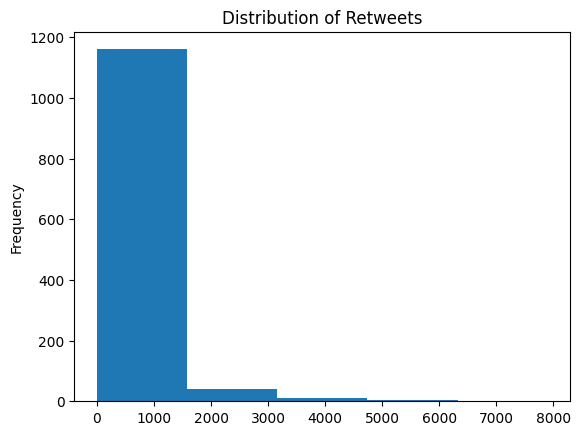

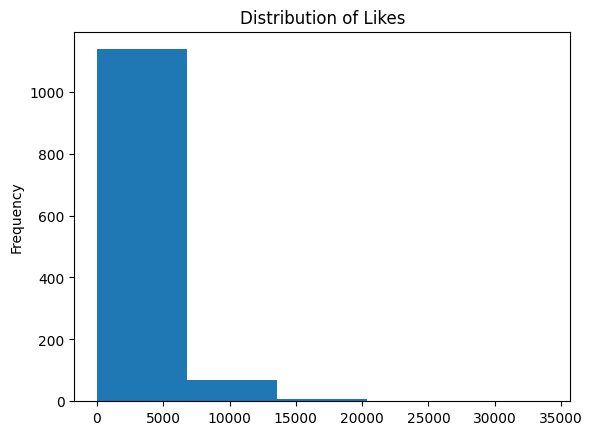

In [4]:
# Plot Retweets and Likes distribution
df['Retweets'].plot(kind='hist', bins=5, title='Distribution of Retweets')
plt.show()

df['Likes'].plot(kind='hist', bins=5, title='Distribution of Likes')
plt.show()


## 3. Data Preparation
We’ll clean the tweet text and prepare it for sentiment analysis:

### Text Cleaning
Clean the text to remove unnecessary elements like mentions, URLs and special characters.

In [5]:
def clean_text(text):
    # Remove mentions, URLs and non-alphabetical characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()  # Convert to lowercase
    return text

# Apply the text cleaning function
df['clean_text'] = df['Text'].apply(clean_text)
df.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes,clean_text
0,1,SUPER METRO 🇰🇪,"Fun fact, Rigathi Gachagua is more intelligent...",Tue Oct 08 16:01:36 +0000 2024,1149,7074,fun fact rigathi gachagua is more intelligent ...
1,2,Abdulahi Adan,"""Mr. Speaker you seat hear today because you n...",Tue Oct 08 15:31:13 +0000 2024,2755,10749,mr speaker you seat hear today because you neg...
2,3,Aadoo Ozzo🇵🇸,"""I made my money during Kibaki's era when the ...",Mon Oct 07 16:55:45 +0000 2024,3229,14176,i made my money during kibakis era when the ec...
3,4,"H.E. Rigathi Gachagua, EGH","1 Thessalonians 5:18 \n\n""Give thanks in all c...",Tue Oct 08 19:35:15 +0000 2024,2336,13309,thessalonians \n\ngive thanks in all circums...
4,5,Kijana Ya Atwoli ( parody ),Rigathi Gachagua is not the problem its Ruto !...,Mon Oct 07 19:59:42 +0000 2024,4473,13777,rigathi gachagua is not the problem its ruto


Tokenization, Stopword Removal and Lemmatization

In [6]:
# Load spacy's language model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Tokenize, remove stopwords, and lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS and token.is_alpha]
    return ' '.join(tokens)

# Apply preprocessing to your 'clean_text' column
df['processed_text'] = df['clean_text'].apply(preprocess_text)
df.head()


,Tweet_count,Username,Text,Created At,Retweets,Likes,clean_text,processed_text
0,1,SUPER METRO 🇰🇪,"Fun fact, Rigathi Gachagua is more intelligent...",Tue Oct 08 16:01:36 +0000 2024,1149,7074,fun fact rigathi gachagua is more intelligent ...,fun fact rigathi gachagua intelligent william ...
1,2,Abdulahi Adan,"""Mr. Speaker you seat hear today because you n...",Tue Oct 08 15:31:13 +0000 2024,2755,10749,mr speaker you seat hear today because you neg...,mr speaker seat hear today negotiate fight sto...
2,3,Aadoo Ozzo🇵🇸,"""I made my money during Kibaki's era when the ...",Mon Oct 07 16:55:45 +0000 2024,3229,14176,i made my money during kibakis era when the ec...,money kibakis era economy strong thing work dp...
3,4,"H.E. Rigathi Gachagua, EGH","1 Thessalonians 5:18 \n\n""Give thanks in all c...",Tue Oct 08 19:35:15 +0000 2024,2336,13309,thessalonians \n\ngive thanks in all circums...,thessalonians thank circumstance god christ jesus
4,5,Kijana Ya Atwoli ( parody ),Rigathi Gachagua is not the problem its Ruto !...,Mon Oct 07 19:59:42 +0000 2024,4473,13777,rigathi gachagua is not the problem its ruto,rigathi gachagua problem ruto


### Sentiment analysis using VADER

In [7]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis
df['Vader_Sentiment'] = df['processed_text'].apply(get_vader_sentiment)
df.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes,clean_text,processed_text,Vader_Sentiment
0,1,SUPER METRO 🇰🇪,"Fun fact, Rigathi Gachagua is more intelligent...",Tue Oct 08 16:01:36 +0000 2024,1149,7074,fun fact rigathi gachagua is more intelligent ...,fun fact rigathi gachagua intelligent william ...,Positive
1,2,Abdulahi Adan,"""Mr. Speaker you seat hear today because you n...",Tue Oct 08 15:31:13 +0000 2024,2755,10749,mr speaker you seat hear today because you neg...,mr speaker seat hear today negotiate fight sto...,Negative
2,3,Aadoo Ozzo🇵🇸,"""I made my money during Kibaki's era when the ...",Mon Oct 07 16:55:45 +0000 2024,3229,14176,i made my money during kibakis era when the ec...,money kibakis era economy strong thing work dp...,Positive
3,4,"H.E. Rigathi Gachagua, EGH","1 Thessalonians 5:18 \n\n""Give thanks in all c...",Tue Oct 08 19:35:15 +0000 2024,2336,13309,thessalonians \n\ngive thanks in all circums...,thessalonians thank circumstance god christ jesus,Positive
4,5,Kijana Ya Atwoli ( parody ),Rigathi Gachagua is not the problem its Ruto !...,Mon Oct 07 19:59:42 +0000 2024,4473,13777,rigathi gachagua is not the problem its ruto,rigathi gachagua problem ruto,Negative


### Visualize Sentiment Distribution
#### Bar Chart for Sentiment Distribution

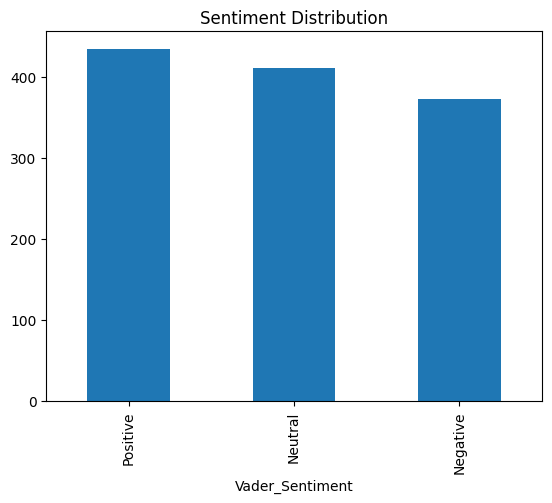

In [8]:
# Plot the bar chart for sentiment distribution
df['Vader_Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


#### Pie chart for sentiment distribution

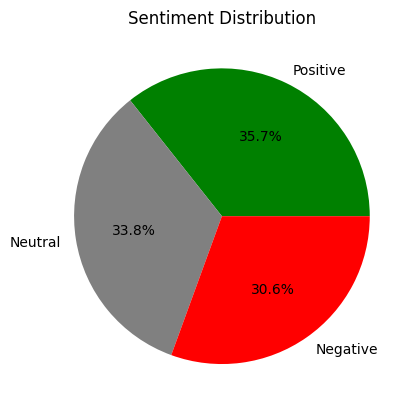

In [9]:
# Plot the pie chart for sentiment distribution
df['Vader_Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Sentiment Distribution',
                                          colors=['green', 'gray', 'red'])
plt.ylabel('') 
plt.show()

### Word cloud for key points

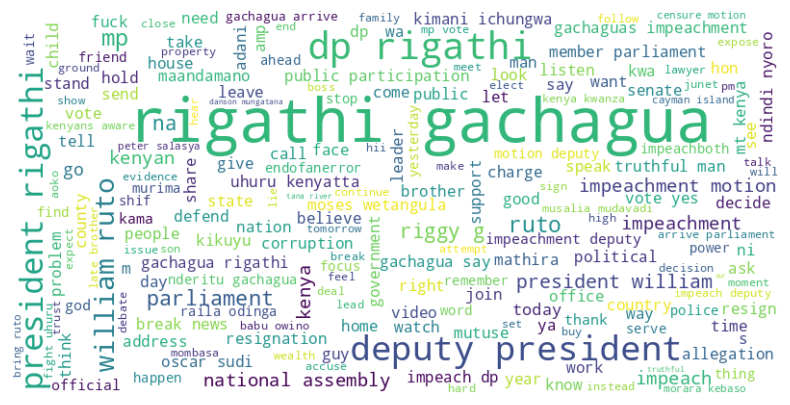

In [10]:
# Join all text into one large string
all_text = ' '.join(df['processed_text'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Sentiment vs Engagement

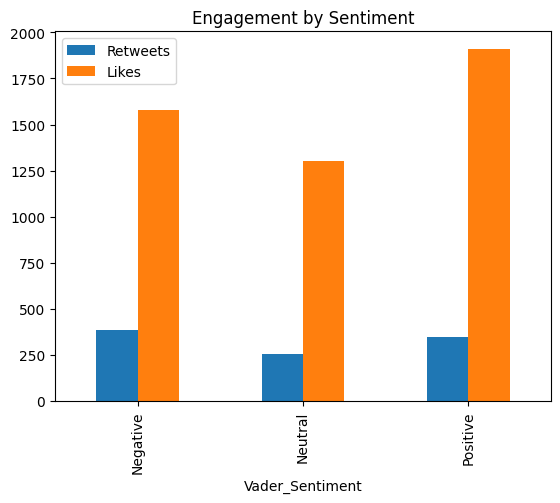

In [11]:
# Calculate average retweets and likes for each sentiment
sentiment_engagement = df.groupby('Vader_Sentiment').agg({'Retweets': 'mean', 'Likes': 'mean'})

# Plot engagement by sentiment
sentiment_engagement.plot(kind='bar', title='Engagement by Sentiment')
plt.show()

Based on the sentiment analysis and engagement metrics from the tweets surrounding Rigathi Gachagua's impeachment:

* Sentiment Distribution:

    35.7% of the tweets reflected a positive sentiment, suggesting a significant portion of the public expressed support or optimism.
    
    33.8% of the tweets were neutral, indicating many tweets were either informational or did not express strong opinions.
    30.6% of the tweets were negative, showing a notable portion of the conversation was critical or dissatisfied.
    
* Engagement by Sentiment:

    Tweets with positive sentiment received the highest engagement in terms of likes and retweets, indicating that supportive or optimistic posts attracted more interaction.
    
    Interestingly, tweets with negative sentiment also received substantial engagement, with high likes but relatively fewer retweets, perhaps reflecting interest or attention to dissenting opinions.
    
    Neutral tweets had moderate engagement, indicating that while neutral content may not have driven as much interaction as positive or negative tweets, it still garnered significant attention.
    
Overall, positive sentiment was the most engaging, but both positive and negative sentiments showed high engagement, suggesting that public discourse is polarized but active on both sides.